In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
query = text("SELECT date FROM measurement ORDER BY date DESC LIMIT 1;")
date_order = engine.execute(query)
for record in date_order:
    print(record[0])

2017-08-23


In [10]:
# Perform a query to retrieve the date and precipitation values sorted by date
query = text("SELECT date, prcp FROM measurement WHERE date >= '2016-08-23' AND prcp IS NOT NULL ORDER BY date")
data_12mo = engine.execute(query)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.read_sql(query,engine.connect())
precip_df = precip_df.rename(columns={"date":"Date", "prcp":"Precipitation (Inches)"})
precip_df

,Date,Precipitation (Inches)
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
...,...,...
2016,2017-08-22,0.50
2017,2017-08-23,0.00
2018,2017-08-23,0.00
2019,2017-08-23,0.08


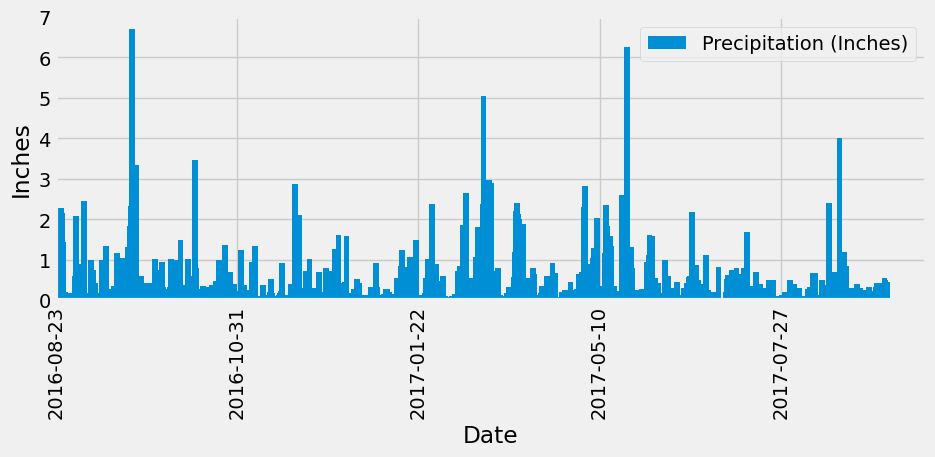

In [11]:
# Drop zero values for the bar chart
precip_notzero = precip_df[precip_df["Precipitation (Inches)"] > 0]

# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_notzero.plot(kind="bar", figsize=(10,3.5), 
                    x="Date", y="Precipitation (Inches)", 
                    rot="vertical", width=8)

# Format y axis
ax.set_ylim(0,7)
ax.set_ylabel("Inches")
# Format xaxis to show dats at roughly evenly spaced intervals
ax.set_xlim(0,1200)
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels([precip_notzero["Date"].loc[precip_notzero.index[0]], 
                    precip_notzero["Date"].loc[precip_notzero.index[275]], 
                    precip_notzero["Date"].loc[precip_notzero.index[550]], 
                    precip_notzero["Date"].loc[precip_notzero.index[825]],
                    precip_notzero["Date"].loc[precip_notzero.index[1100]]])

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Reference pulling in quartiles to the aggregate example from Stack Overflow: https://stackoverflow.com/questions/17578115/pass-percentiles-to-pandas-agg-function
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = '{:02.0f}%'.format(n*100)
    return percentile_

summ_stats = precip_df["Precipitation (Inches)"].agg(func=["count", "mean", "std", "min", percentile(0.25), percentile(0.50), percentile(0.75), "max"])
summ_stats.to_frame()

,Precipitation (Inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

Text(0, 0.5, 'Inches')

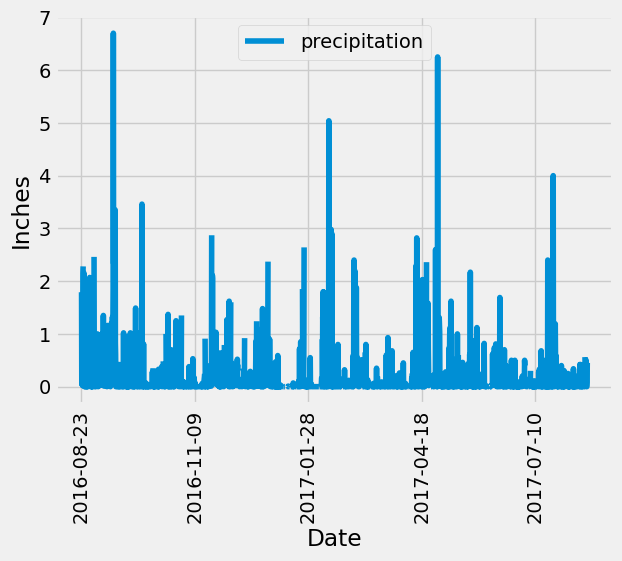

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_cnt = session.query(station.station).distinct().count()
station_cnt

9

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("SELECT station, COUNT(id) AS Counts FROM measurement GROUP BY station ORDER BY Counts DESC")
station_counts = engine.execute(query)
for record in station_counts:
    print(record)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text("SELECT MIN(tobs) AS lowest, MAX(tobs) AS highest, AVG(tobs) AS Average FROM measurement WHERE station='USC00519281'")
USC00519281_stats = engine.execute(query)
for record in USC00519281_stats:
    print(record)

(54.0, 85.0, 71.66378066378067)


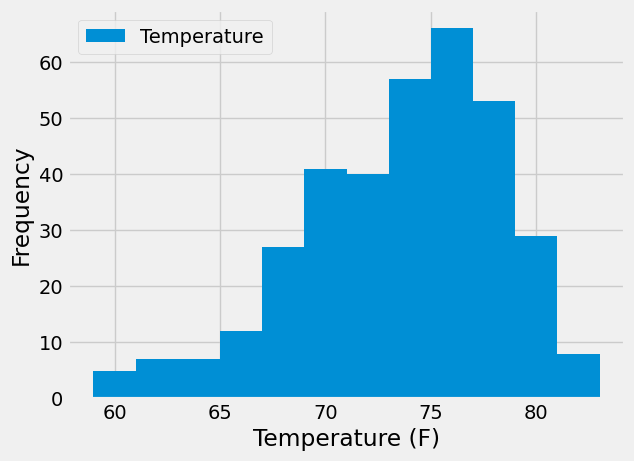

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the temperature for the last year of station USC00519281
query = text("SELECT tobs FROM measurement WHERE date >= '2016-08-23' AND station = 'USC00519281' AND tobs IS NOT NULL")
USC00519281_12mo_temp = engine.execute(query)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
USC00519281_12mo_temp_df = pd.read_sql(query,engine.connect())
USC00519281_12mo_temp_df = USC00519281_12mo_temp_df.rename(columns={"tobs":"Temperature"})

# Use pandas histogram plot
ax = USC00519281_12mo_temp_df.plot.hist(bins=12)
ax.set_xlabel("Temperature (F)")
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

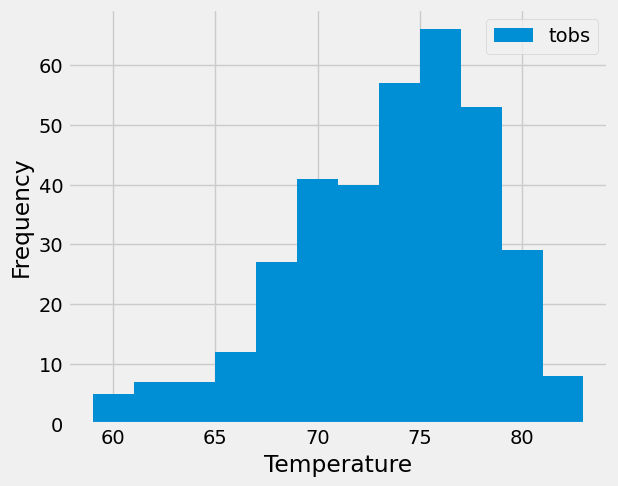

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [17]:
# Close Session
session.close()